# Pattern Recognition and Machine Learning

## Programming Assignment 1
### by Saurav Kumar (SC16B108)

1. (a) Generate a data set of N = 1,000 that stem from two equiprobable classes modeled by normal distributions with means, $m_1 = 0$, $m_2 = 3$ and variances (A) $σ_1 = σ_2 = 2$ (B) $σ_1 = 2, σ_2 = 4$ <br>
(b) Plot the likelihood for each class.
<br>
(c) Plot the posterior for each class.
<br>
(d) Plot the posterior for each class when the prior probabilities are $P = [0.7, 0.3]^T$

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, multivariate_normal
from mpl_toolkits.mplot3d import Axes3D


In [91]:
sns.set(color_codes=True)

In [92]:
N = 1000
mu1 = 0
mu2 = 3
sigma1 = 2
sigma2 = 2

In [93]:
A = [0,1]

In [94]:
X0 = []
X1 = []
for i in range(1000):
    choice = np.random.choice(A) # equiprobab
    if(choice==0):
        X0.append(np.random.normal(mu1,sigma1))
    else:
        X1.append(np.random.normal(mu2,sigma2))
        

In [95]:
data0 = np.zeros((len(X0),2))
data1 = np.ones((len(X1),2))
data0[:, 0] = X0
data1[:, 0] = X1

In [96]:
df0 = pd.DataFrame(data0,columns = ('Feature', 'Class'))
df1 = pd.DataFrame(data1,columns = ('Feature', 'Class'))
df = df0.append(df1,ignore_index=True)

In [97]:
dataset = df.sample(frac=1).reset_index(drop=True)
# dataset generated

In [98]:
# likelihood is calculated by putting the value of x in gaussian funcn
P0 = norm(mu1,sigma1).pdf(data0[:,0])
P1 = norm(mu2,sigma2).pdf(data1[:,0])

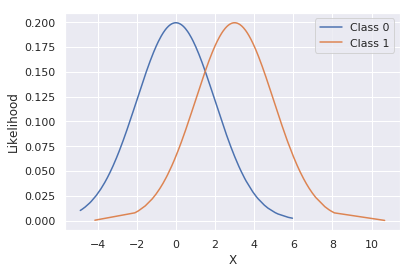

In [99]:
# sorting x axis values for line plot else plots will cross each other
order = np.argsort(data0[:,0])
xs0 = np.array(data0[:,0])[order]
ys0 = np.array(P0)[order]
plt.plot(xs0,ys0) # likelihood of 1st class
plt.xlabel('X')
plt.ylabel('Likelihood')
order = np.argsort(data1[:,0])
xs1 = np.array(data1[:,0])[order]
ys1 = np.array(P1)[order]
plt.plot(xs1,ys1) # likelihood of 2nd class
plt.legend(['Class 0','Class 1'])

In [100]:
def Posterior(Prior_prob):
    #Posterior_Probab = likelihood*Prior_prob/(sigma(likelihood)*prior + likelihood*prior)
    #%%
    #normalization factor, Z or P(X)
    P_x = np.sum(P0*Prior_prob[0]) + np.sum(P1*Prior_prob[1])

    Posterior_0 = P0*Prior_prob[0]/P_x
    Posterior_1 = P1*Prior_prob[1]/P_x
    
    order = np.argsort(data0[:,0])
    xs3 = np.array(data0[:,0])[order]
    ys3 = np.array(Posterior_0)[order]
    plt.plot(xs3,ys3) # posterior of 1st class
    plt.xlabel('X')
    plt.ylabel('Posterior')
    order = np.argsort(data1[:,0])
    xs4 = np.array(data1[:,0])[order]
    ys4 = np.array(Posterior_1)[order]
    plt.plot(xs4,ys4) # posterior of 2nd class
    plt.xlabel('X')
    plt.ylabel('Posterior')
    plt.legend(['Class 0', 'Class 1'])

In [101]:
Prior_prob = [0.5, 0.5]

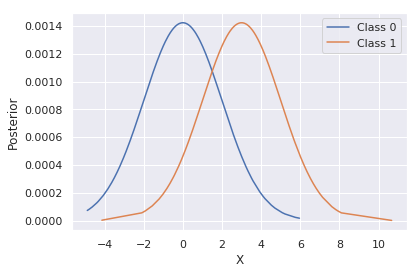

In [102]:
Posterior(Prior_prob)

In [103]:
Prior_prob = [0.7, 0.3]

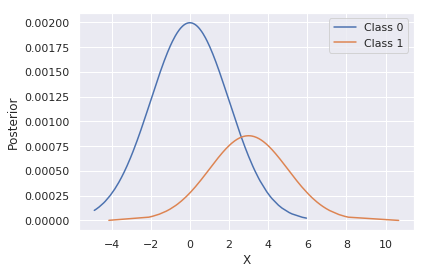

In [104]:
Posterior(Prior_prob)

2. (a) Generate and plot a data set of N = 1,000 two-dimensional vectors that stem from three equiprobable classes modeled by normal distributions with mean vectors, $m_1 = [1, 1]^T$ , $m_2 = [7, 7]^T$ , $m_3 = [15, 1]^T$ and covariance matrices,

$
S_1 = \begin{bmatrix}
    12 & 0 \\
    0 & 1 \\
\end{bmatrix}$
$
S_2 = \begin{bmatrix}
    8 & 3 \\
    3 & 2 \\
\end{bmatrix}$
$
S_3 = \begin{bmatrix}
    2 & 0 \\
    0 & 2 \\
\end{bmatrix}$
<br>
(b) Plot the 2D likelihood for each class.
<br>
(c) Plot the posterior for each class.<br>
(d) Plot the posterior for each class when the prior probabilities are $P = [0.6, 0.3,0.1]^T$

In [105]:
N = 1000
mean1 = [1,1]
mean2 = [7,7]
mean3 = [15,1]
cov1 = [[12,0],[0,1]]
cov2 = [[8,3],[3,2]]
cov3 = [[2,0],[0,2]]

In [106]:
Classes = [0,1,2]

In [107]:
X0 = [[],[]]
X1 = [[],[]]
X2 = [[],[]]

In [108]:
for i in range(1000):
    choice = np.random.choice(Classes) # equiprobab
    if choice==0:
        #X0.append(np.random.normal(mu1,sigma1))
        x0, y0 = np.random.multivariate_normal(mean1, cov1)
        X0[0].append(x0)
        X0[1].append(y0)
    elif choice==1:
        #X1.append(np.random.normal(mu2,sigma2))
        x1, y1 = np.random.multivariate_normal(mean2, cov2)
        X1[0].append(x1)
        X1[1].append(y1)
    else:
        #X2.append(np.random.normal(mu3,sigma3))
        x2, y2 = np.random.multivariate_normal(mean3, cov3)
        X2[0].append(x2)
        X2[1].append(y2)

In [109]:

X_0 = np.transpose(np.asarray(X0))
X_1 = np.transpose(np.asarray(X1))
X_2 = np.transpose(np.asarray(X2))

In [110]:

data0 = np.zeros((len(X_0),3))
data1 = np.ones((len(X_1),3))
data2 = 2 * np.ones((len(X_2),3))
data0[:,[0,1]] = X_0
data1[:,[0,1]] = X_1
data2[:,[0,1]] = X_2

In [111]:

df0 = pd.DataFrame(data0,columns = ('X1','X2','Class'))
df1 = pd.DataFrame(data1,columns = ('X1','X2','Class'))
df2 = pd.DataFrame(data2,columns = ('X1','X2','Class'))
df = df0.append([df1,df2],ignore_index=True)
dataset = df.sample(frac=1).reset_index(drop=True)

In [112]:
# likelihood is calculated by putting the value of x in multivariate normal funcn

P0 = multivariate_normal.pdf(data0[:,[0,1]],mean = mean1, cov = cov1)
P1 = multivariate_normal.pdf(data1[:,[0,1]],mean = mean2, cov = cov2)
P2 = multivariate_normal.pdf(data2[:,[0,1]],mean = mean3, cov = cov3)

Text(0.5,0,'Feature 2')

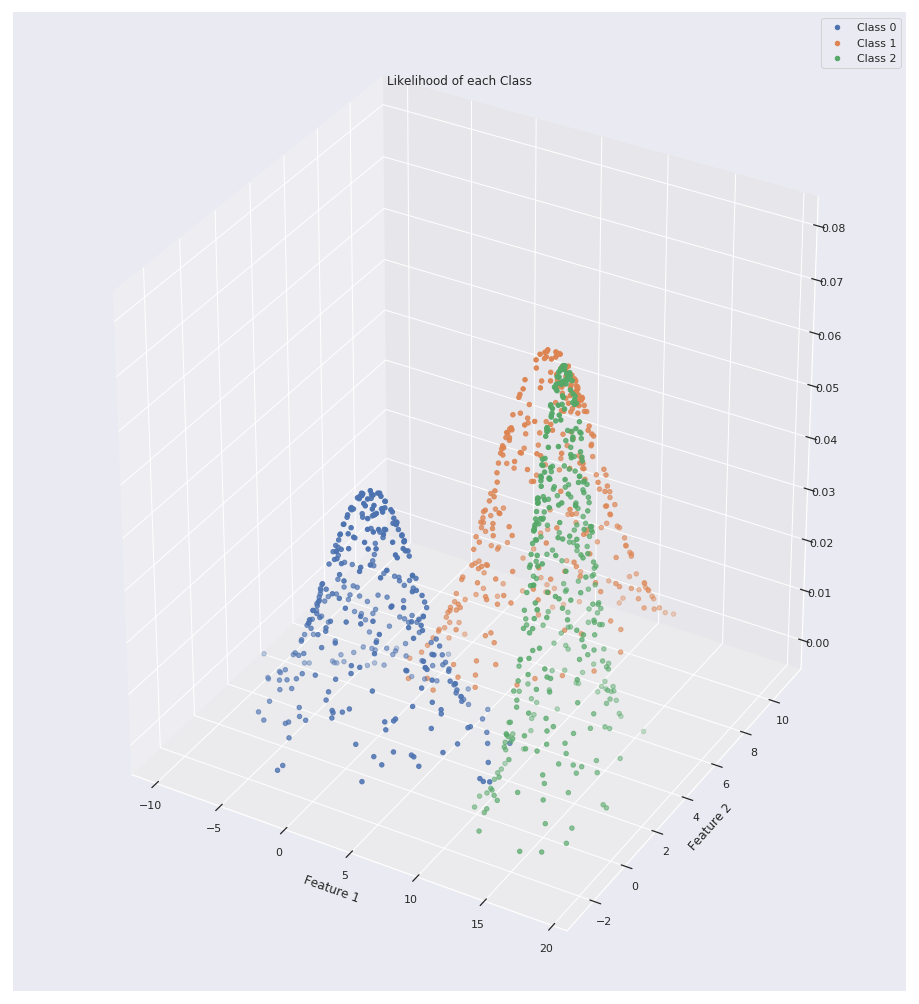

In [114]:
order = np.argsort(data0[:,0])
xs0 = np.array(data0[:,0])[order]
ys0 = np.array(data0[:,1])[order]
zs0 = np.array(P0)[order]
fig = plt.figure(figsize=(16,18))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs0,ys0,zs0) # likelihood of 1st class

order = np.argsort(data1[:,0])
xs1 = np.array(data1[:,0])[order]
ys1 = np.array(data1[:,1])[order]
zs1 = np.array(P1)[order]
ax.scatter(xs1,ys1,zs1) # likelihood of 2nd class

order = np.argsort(data2[:,0])
xs2 = np.array(data2[:,0])[order]
ys2 = np.array(data2[:,1])[order]
zs2 = np.array(P2)[order]
ax.scatter(xs2,ys2,zs2) # likelihood of 3rd class
ax.legend(['Class 0', 'Class 1', 'Class 2'])
plt.title('Likelihood of each Class')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [117]:
def Posterior2(Prior_prob):
    #Prior_prob = [1/3, 1/3, 1/3]
    P_x = np.sum(P0*Prior_prob[0]) + np.sum(P1*Prior_prob[1]) + np.sum(P2*Prior_prob[2])
    
    Posterior_0 = P0*Prior_prob[0]/P_x
    Posterior_1 = P1*Prior_prob[1]/P_x
    Posterior_2 = P2*Prior_prob[2]/P_x
    
    order = np.argsort(data0[:,0])
    xs0 = np.array(data0[:,0])[order]
    ys0 = np.array(data0[:,1])[order]
    zs0 = np.array(Posterior_0)[order]
    fig = plt.figure(figsize=(16,18))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs0,ys0,zs0) # likelihood of 1st class

    order = np.argsort(data1[:,0])
    xs1 = np.array(data1[:,0])[order]
    ys1 = np.array(data1[:,1])[order]
    zs1 = np.array(Posterior_1)[order]
    ax.scatter(xs1,ys1,zs1) # likelihood of 2nd class

    order = np.argsort(data2[:,0])
    xs2 = np.array(data2[:,0])[order]
    ys2 = np.array(data2[:,1])[order]
    zs2 = np.array(Posterior_2)[order]
    ax.scatter(xs2,ys2,zs2) # likelihood of 3rd class
    ax.legend(['Class 0', 'Class 1', 'Class 2'])
    plt.title('Posterior of each Class')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

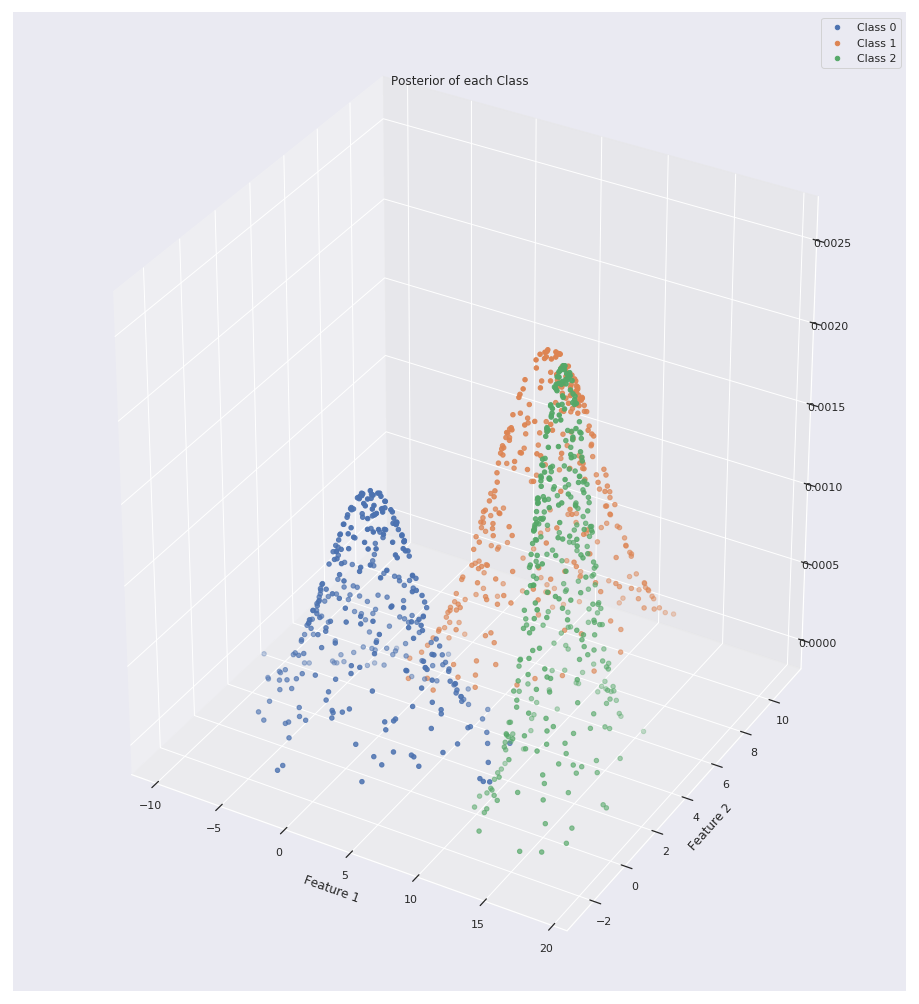

In [118]:
Prior_prob = [1/3,1/3,1/3]
Posterior2(Prior_prob)

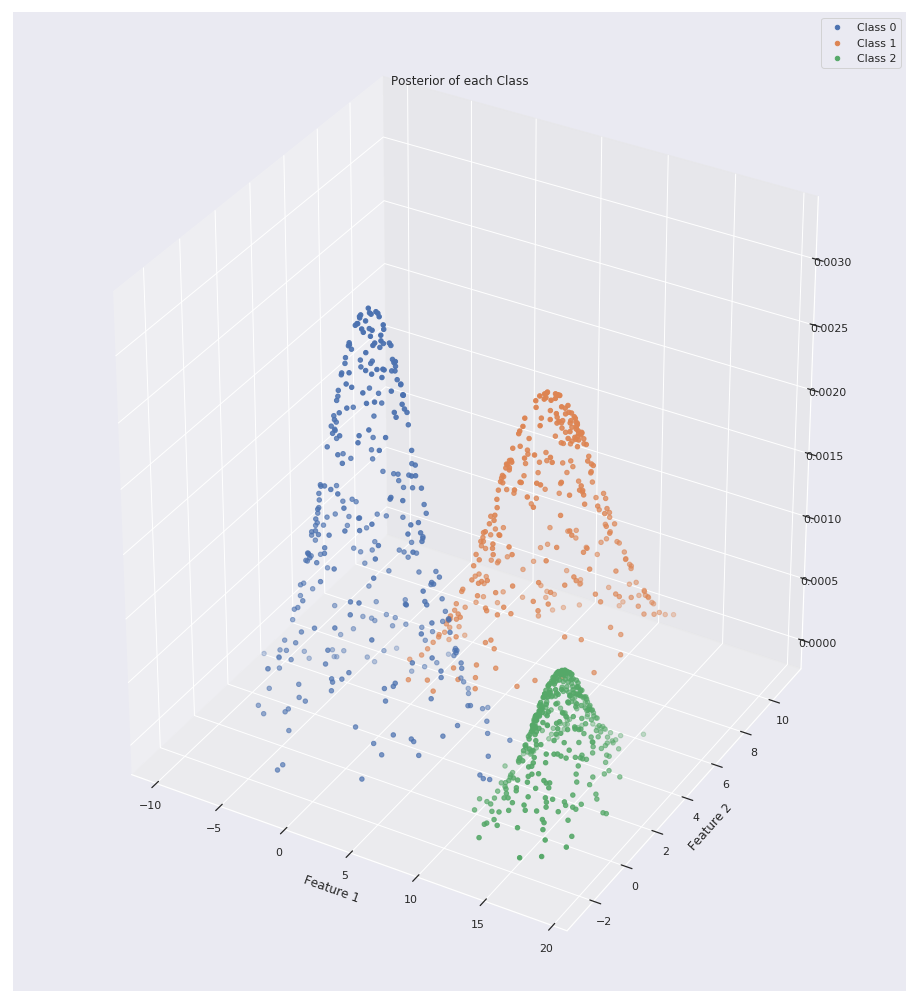

In [119]:
Prior_prob = [0.6,0.3,0.1]
Posterior2(Prior_prob)

3. Classify the 10 samples from Table 1 using Bayesian Classifier. Assume that the under-lying distributions are normal. <br>
(a) Assume that the prior probabilities for the first two categories are equal (P(1) =
P(2) = 1/2 and P(3) = 0) and design a dichotomizer for those two categories using
only the x1 feature value.<br>
(b) Repeat all of the above, but now use two feature values, x1, and x2.<br>
(c) Repeat all of the above, but now use all the three feature values.
<br>
(d) Discuss your results. Determine the empirical training error on your samples, i.e.,
the percentage of points misclassified.

In [124]:
df = pd.read_csv("dataset.csv")
df.head()

,X1,X2,X3,Y
0,-5.01,-8.12,-3.68,1
1,-5.43,-3.48,-3.54,1
2,1.08,-5.52,1.66,1
3,0.86,-3.78,-4.11,1
4,-2.67,0.63,7.39,1


In [168]:
df1 = df.iloc[0:10,:]
df2 = df.iloc[10:20,:]
df3 = df.iloc[20:30,:]

In [178]:
mu1 = df1.mean()
mu2 = df2.mean()
mu3 = df3.mean()
sigma1 = df1.std()
sigma2 = df2.std()
sigma3 = df3.std()

In [182]:
#likelihood is calculated by putting the value of x in gaussian funcn
P_x1_C1 = norm(mu1[0],sigma1[0]).pdf(df.values[:,0])
P_x1_C2 = norm(mu2[0],sigma2[0]).pdf(df.values[:,0])
P_x1_C3 = norm(mu3[0],sigma3[0]).pdf(df.values[:,0])
prior_prob = [1/2, 1/2, 0]
P_x = np.sum(P_x1_C1*prior_prob[0]) + np.sum(P_x1_C2*prior_prob[1]) + np.sum(P_x1_C3*prior_prob[2])


In [183]:
P_C1_x1 = P_x1_C1*prior_prob[0]/P_x
P_C2_x1 = P_x1_C2*prior_prob[1]/P_x
P_C3_x1 = P_x1_C3*prior_prob[2]/P_x

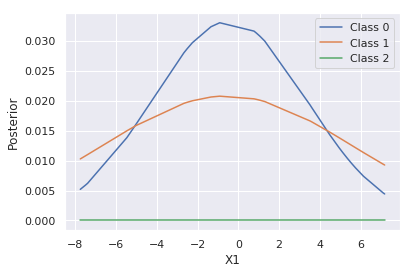

In [185]:
order = np.argsort(df.values[:,0])
xs1 = np.array(df.values[:,0])[order]
ys1 = np.array(P_C1_x1)[order]
plt.plot(xs1,ys1) # posterior of 1st class
plt.xlabel('X1')
plt.ylabel('Posterior')
order = np.argsort(df.values[:,0])
xs2 = np.array(df.values[:,0])[order]
ys2 = np.array(P_C2_x1)[order]
plt.plot(xs2,ys2) # posterior of 2nd class
ys3 = np.array(P_C3_x1)[order]
plt.plot(xs2,ys3)
plt.legend(['Class 0', 'Class 1','Class 2'])

In [198]:
C=[]
for i in range(0,len(df.values[:,0])):
    values = [P_C1_x1[i],P_C2_x1[i],P_C3_x1[i]]
    C.append(values.index(max(values))+1)

In [200]:
error = np.mean( C != df.values[:,3] )

In [201]:
error

0.5333333333333333